<a href="https://colab.research.google.com/github/KaziTanvr/shopifyDataScience/blob/main/Shopify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading dataset from google drive
url = 'https://drive.google.com/file/d/1rpwNgSRJpseaYOJfHfYxUO5VwqwSX-Nr/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
shoe = pd.read_csv(path)

In [3]:
# Checking if there are any null values
shoe.isnull().sum().to_frame()

,0
order_id,0
shop_id,0
user_id,0
order_amount,0
total_items,0
payment_method,0
created_at,0


In [4]:
# Observing  the columns
shoe.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [5]:
# Validating claimed 30 days data
print('Date Range: ' + min(shoe['created_at']) + ' and ' + max(shoe['created_at']) )  

Date Range: 2017-03-01 0:08:09 and 2017-03-30 9:55:00


In [6]:
# 'order_amount' & 'total_items' are the two most important columns for this analysis
shoe[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


**Answer 1 (a)**

> Mentioned AOV is a straight forward mean of 'order-amount'. While the calculation of AOV is correct, **the correlation between affordability & AOV is flawed**. Here is why :
*  AOV doesn't tell amount of items per order. 
*  For instance, other small businesses can order in bulk, which will increase the AOV



> 'Order_amount' & 'total_items' for Top 25% is simply gigantic comparing with the bottom 75%. That's why Standard Deviation (std) is very huge. It's obvious that there are **some outliers in the dataset**. 

> we can see that the outliers on both 'order_amount' and 'total_items'




**Better Approach to evaluate this data**

> We will develop a new feature called **"price_per_item"** which will represent the affordability of the sneakers. And we will also remove outliers from the dataset.


In [7]:
shoe['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

In [8]:
shoe['order_amount'].value_counts(sort = False)

112       48
116       23
128       30
132       23
136       38
          ..
655        1
735        1
815        2
935        3
704000    17
Name: order_amount, Length: 258, dtype: int64

These are the Outliers
> There are 17 entries of 704K order value

> There are 17 entries of 2000 items per order

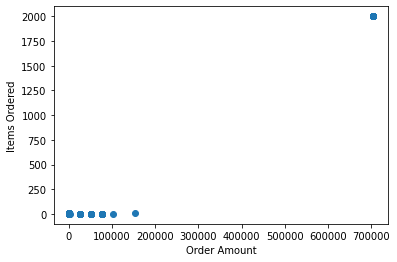

In [9]:
# Scatter plot will also confirm us the outliers in our dataset
x = shoe['order_amount']
y = shoe['total_items']
plt.scatter(x, y)
plt.xlabel("Order Amount")
plt.ylabel("Items Ordered")
plt.show()

> We can see there is just one point which is significantly distant from other data points. Later we will analysis this outliers and reason behind it.

In [10]:
# We will create a custome datframe to work only with the columns we need
shoe_cus = shoe.copy()
shoe_cus = shoe_cus[['shop_id','user_id','order_amount', 'total_items']]

# Creating 'price_per_item' column
shoe_cus['price_per_item'] = shoe_cus['order_amount'] / shoe_cus['total_items']

**Created the 'price_per_item' feature to better understand the data**

In [11]:
# Observing the outliers from 'Order_amount'
shoe_cus.sort_values(by='order_amount', ascending=False).head()

,shop_id,user_id,order_amount,total_items,price_per_item
2153,42,607,704000,2000,352.0
3332,42,607,704000,2000,352.0
520,42,607,704000,2000,352.0
1602,42,607,704000,2000,352.0
60,42,607,704000,2000,352.0


> user_id: 607 is ordering in bulk from Shop 42

In [12]:
#Checking whether any shop is Overpricing or not
shoe_cus.sort_values(by='price_per_item', ascending=False)

,shop_id,user_id,order_amount,total_items,price_per_item
4420,78,969,77175,3,25725.0
2906,78,817,77175,3,25725.0
4505,78,866,25725,1,25725.0
493,78,983,51450,2,25725.0
2452,78,709,51450,2,25725.0
...,...,...,...,...,...
2714,92,905,180,2,90.0
3915,92,760,180,2,90.0
4760,92,937,90,1,90.0
2128,92,729,180,2,90.0


> Shop_id :78 is overpricing the product so we will remove this. By removing this we will get an accurate estimate about the price of sneakers **across all other shops**

In [13]:
# Removing 'Shop 78' & 'Custoemr 607'
shoe_cus = shoe_cus[(shoe_cus['shop_id'] != 78)]
shoe_cus = shoe_cus[(shoe_cus['user_id'] != 607)]
shoe_cus.sort_values(by='price_per_item', ascending=False)

,shop_id,user_id,order_amount,total_items,price_per_item
1364,42,797,1760,5,352.0
834,42,792,352,1,352.0
1512,42,946,352,1,352.0
2018,42,739,352,1,352.0
4294,42,859,704,2,352.0
...,...,...,...,...,...
2871,92,854,180,2,90.0
1890,92,824,180,2,90.0
228,92,757,90,1,90.0
1927,92,960,270,3,90.0


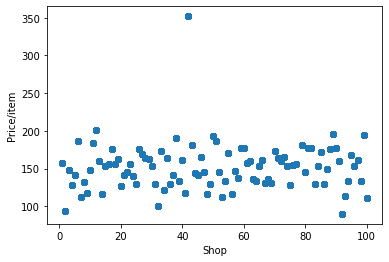

In [14]:
# Scatter plot will confirm whether our data is now outlier free or not
x = shoe_cus['shop_id']
y = shoe_cus['price_per_item']
plt.scatter(x, y)
plt.xlabel("Shop")
plt.ylabel("Price/item")
plt.show()

> It seems that there is still one outlier in our dataset  and shop_id: 42 is the reason behind it.

In [15]:
# We will observe shop_id: 42 to confirm 
shoe_cus[(shoe_cus['shop_id'] == 42)].head()

,shop_id,user_id,order_amount,total_items,price_per_item
40,42,793,352,1,352.0
308,42,770,352,1,352.0
409,42,904,704,2,352.0
834,42,792,352,1,352.0
835,42,819,704,2,352.0


In [16]:
# we will remove shop_id: 42 to get a more uniform dataset
shoe_cus = shoe_cus[(shoe_cus['shop_id'] != 42)]

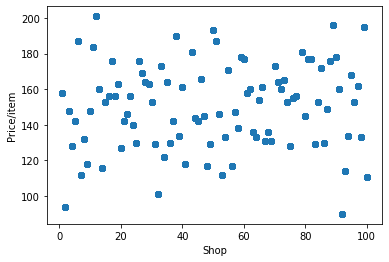

In [17]:
# Scatter plot will confirm whether our data is now outlier free or not
x = shoe_cus['shop_id']
y = shoe_cus['price_per_item']
plt.scatter(x, y)
plt.xlabel("Shop")
plt.ylabel("Price/item")
plt.show()

In [18]:
shoe_cus['price_per_item'].describe()

count    4903.000000
mean      150.400163
std        23.851202
min        90.000000
25%       132.000000
50%       153.000000
75%       166.000000
max       201.000000
Name: price_per_item, dtype: float64

In [19]:
# Average Priec per sneaker
np.mean(shoe_cus['price_per_item'])

150.40016316540894

In [20]:
# Average Order value
np.mean(shoe_cus['order_amount'])

300.1558229655313

In [21]:
# Average Items ordered
np.mean(shoe_cus['total_items'])

1.9957169080155006

> **Now everything makes sense**

*   Average price of the sneaker is USD 150, which is affordable
*   Average Order value USD 300 & On average people ordered aprrox. 2 items





> **Ans 1(b):** It's obvious that Mean (Average Order Value) is not a good metric to represent this dataset. We have  to choose a metric that is robust againts Outliers. We could choose Z Score(Standard Score) but it's not the easiest metric to understand for everyone. Instead we will select such a metric that is easy to understand and give holistic idea about the dataset. Therefore, I will report **Median Order Value** to represent this dataset.

In [22]:
shoe['order_amount'].median()

284.0

>**Ans 1(c):** Median Order Amount: **USD 284**

In [23]:
shoe['order_amount'].mode()

0    153
dtype: int64

**Question 2 (SQL Part)**


> 2 (a)
```
SELECT COUNT(*) AS Num_of_Orders
FROM Orders O
INNER JOIN Shippers S
	ON O.ShipperID = S.ShipperId
WHERE S.ShipperName = 'Speedy Express'
```
Ans : 54


> 2 (b)
 ```
Select Employees.LastName, Count(Orders.OrderID) As NumberOfOrders From Orders
Left Join Employees ON Orders.EmployeeID = Employees.EmployeeID
Group by LastName Order by NumberOfOrders Desc
Limit 1;
 ```
 Ans : Peacock , NumberOfOrders : 40



> 2 (c)
```
SELECT p.ProductName, SUM(Quantity) AS TotalQuantity
FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p
WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID
GROUP BY p.ProductID
ORDER BY TotalQuantity DESC
LIMIT 1;
```
Ans: 'Boston Crab Meat' with 160 TotalQuantity
